# Load results to compare the summary networks

In [1]:
# load the results images and plot them next to each other
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

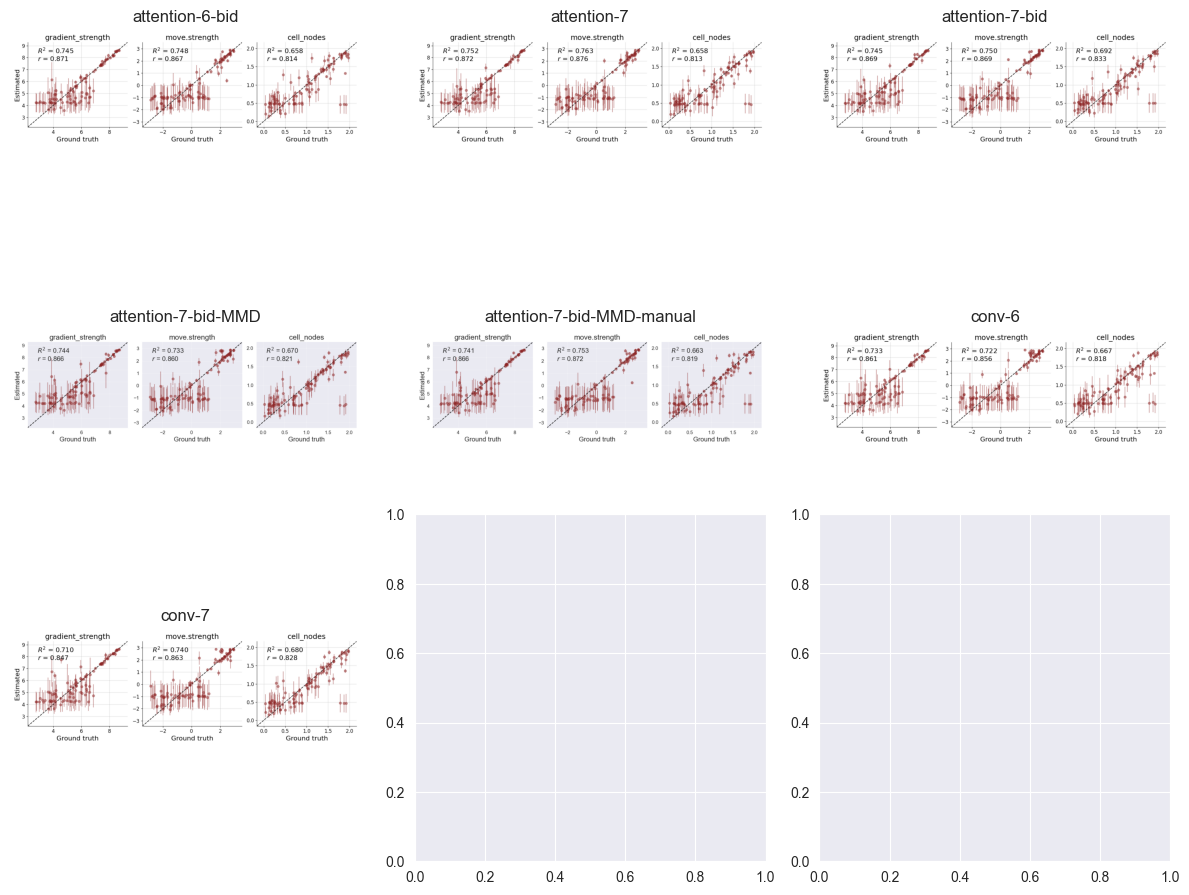

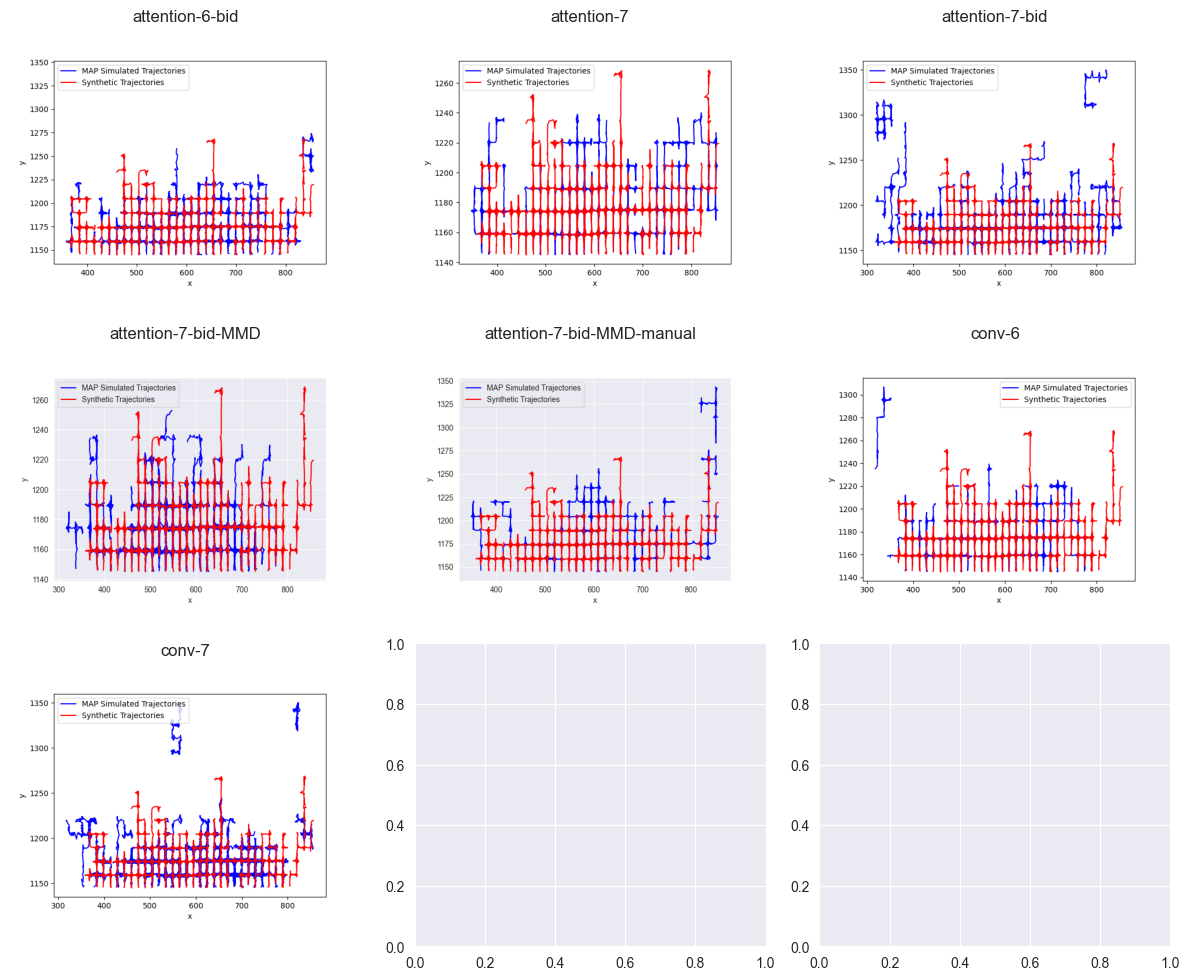

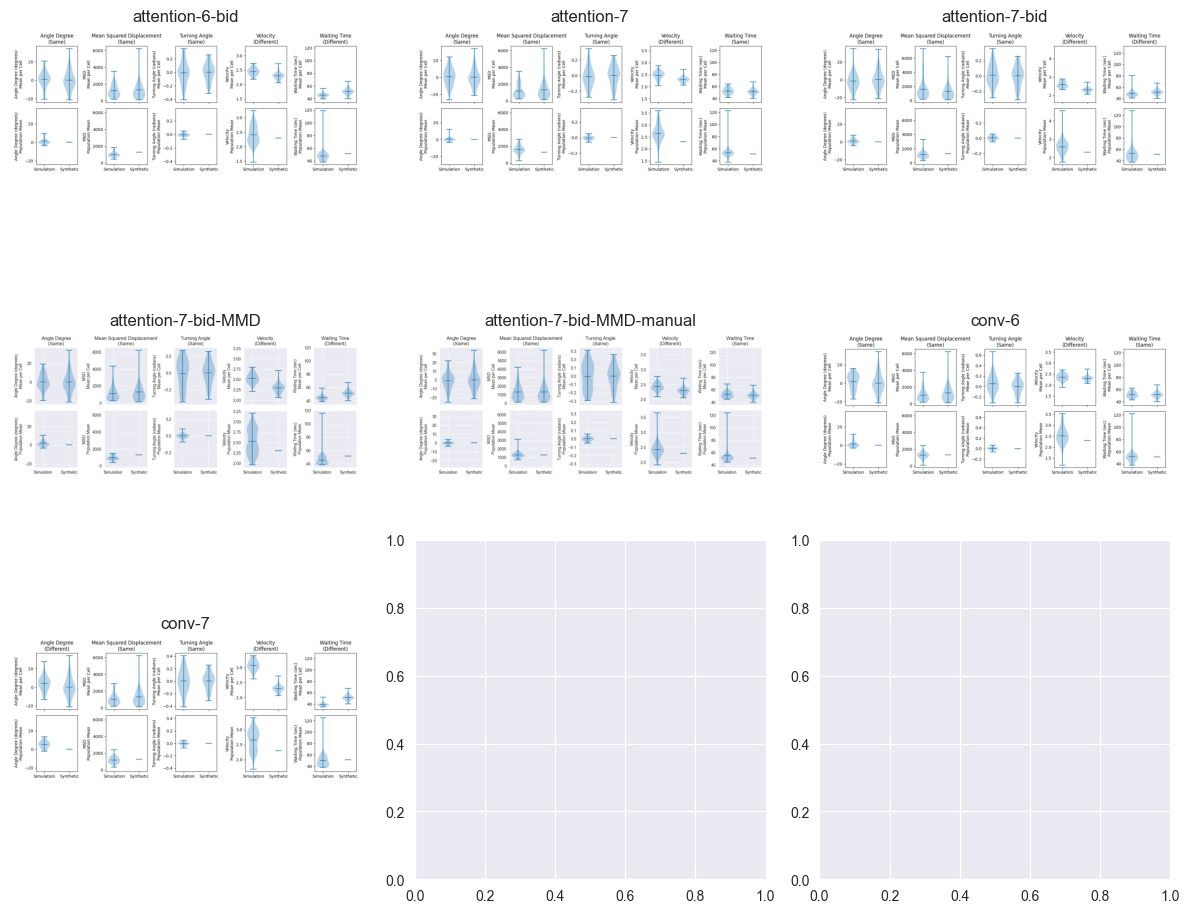

In [3]:
# get all folders in the current directory
folders = [f for f in os.listdir() if os.path.isdir(f)]
# remove old
folders.remove("old")
folders.sort()
# open all folders and plot them in a row
result_images = ["recovery.png", "Simulations.png", "Summary Stats.png"]

for img_name in result_images:
    fig, ax = plt.subplots(3, len(folders)//2, tight_layout=True, figsize=(12, 10))
    ax = ax.flatten()
    for i, folder in enumerate(folders):
        img = mpimg.imread(os.path.join(folder, img_name))
        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(folder[25:])    
    plt.show()

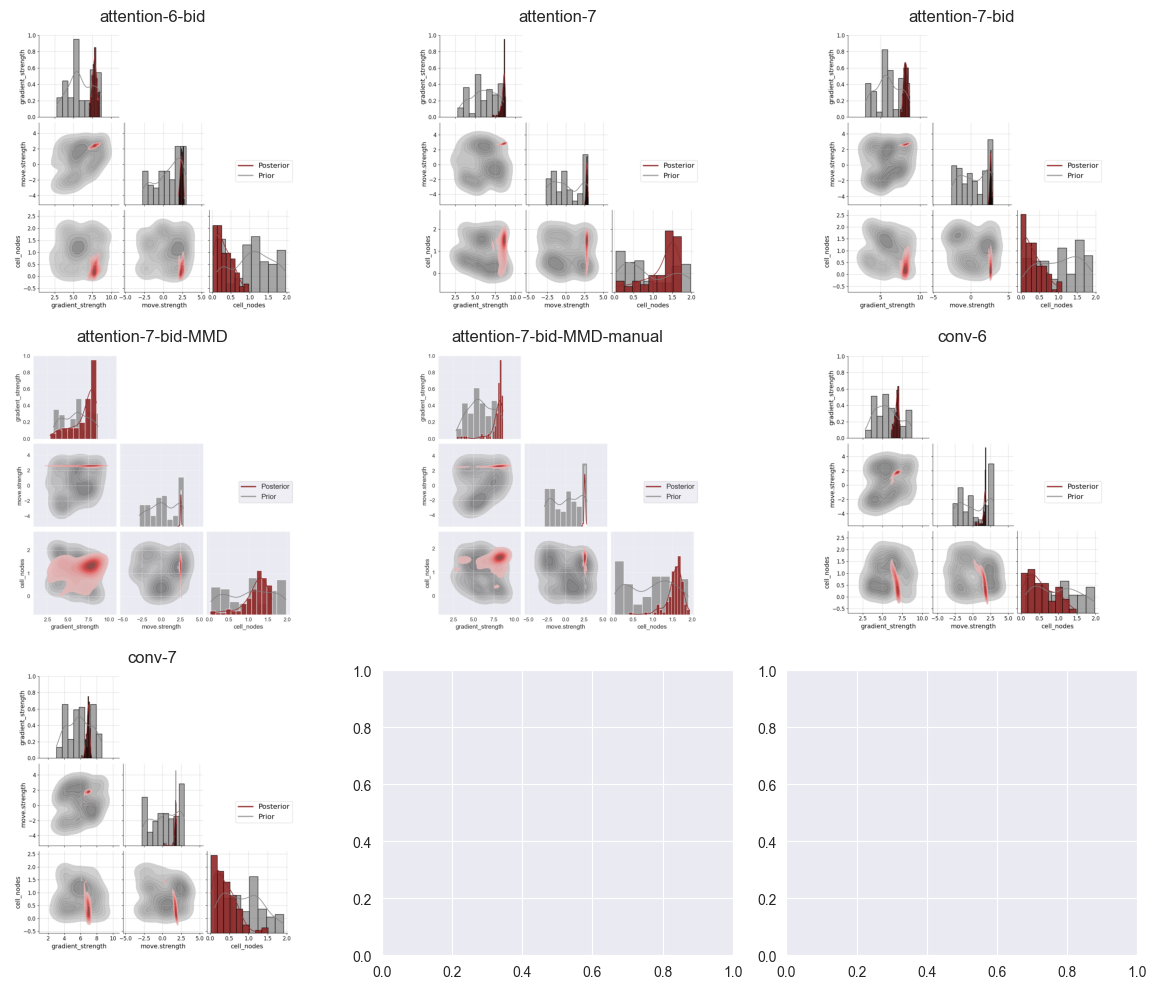

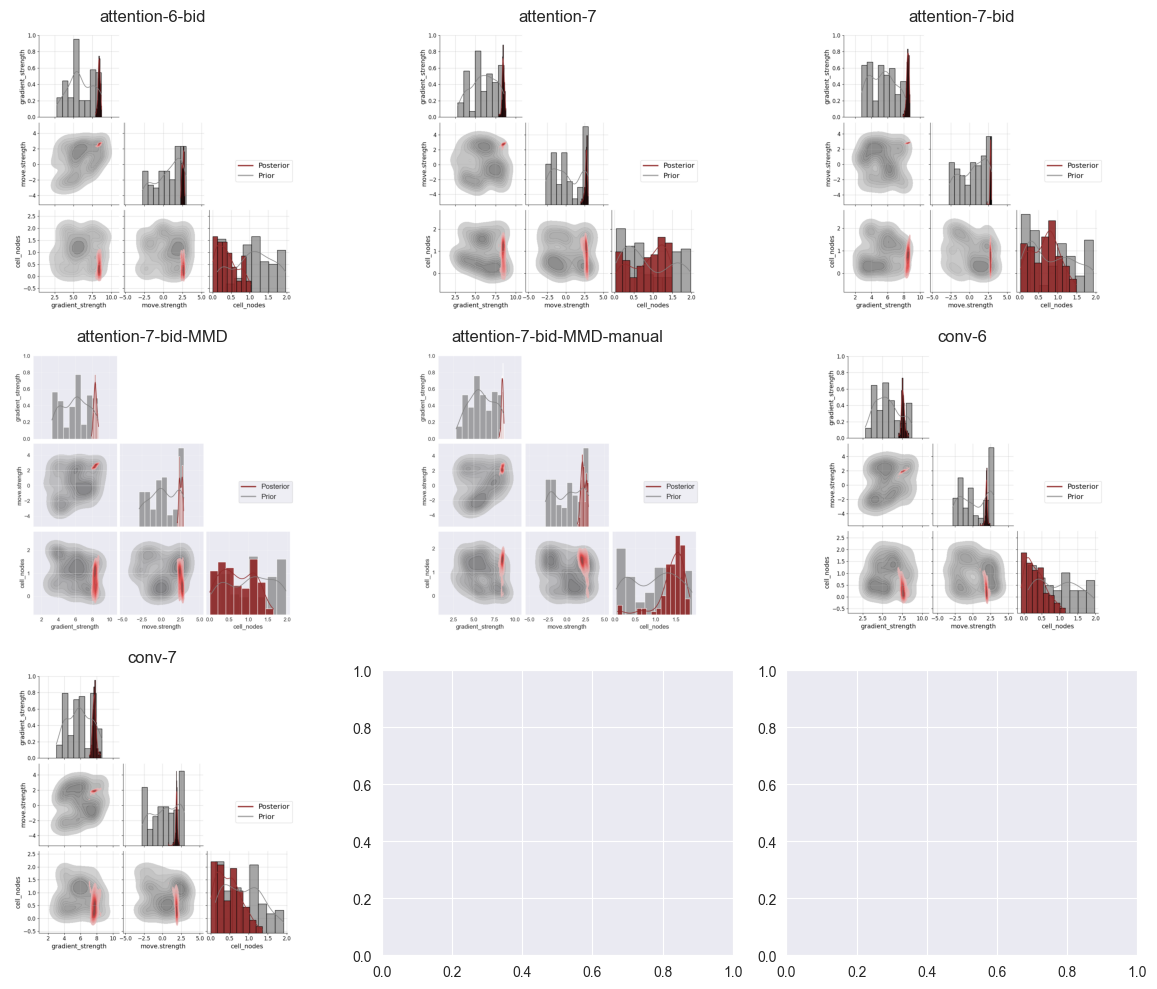

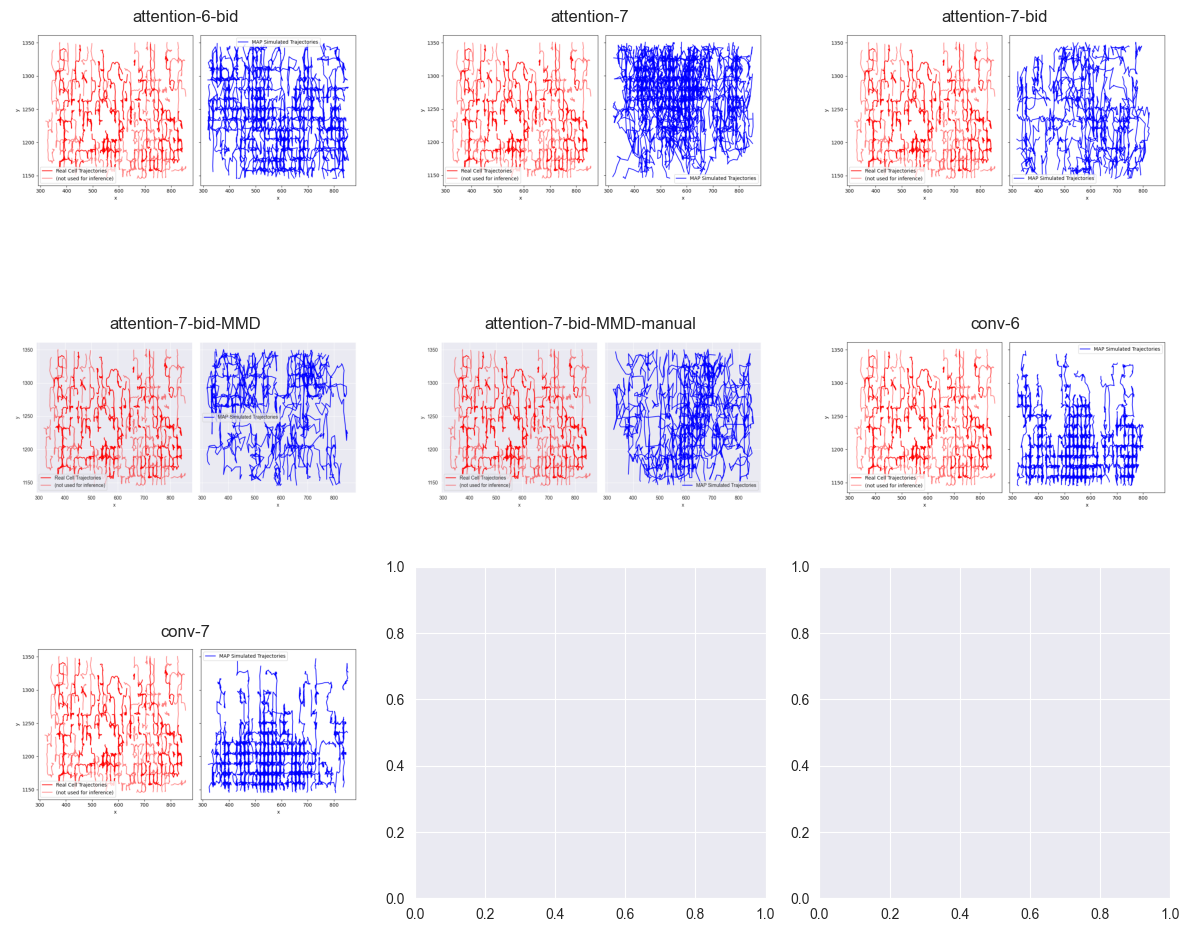

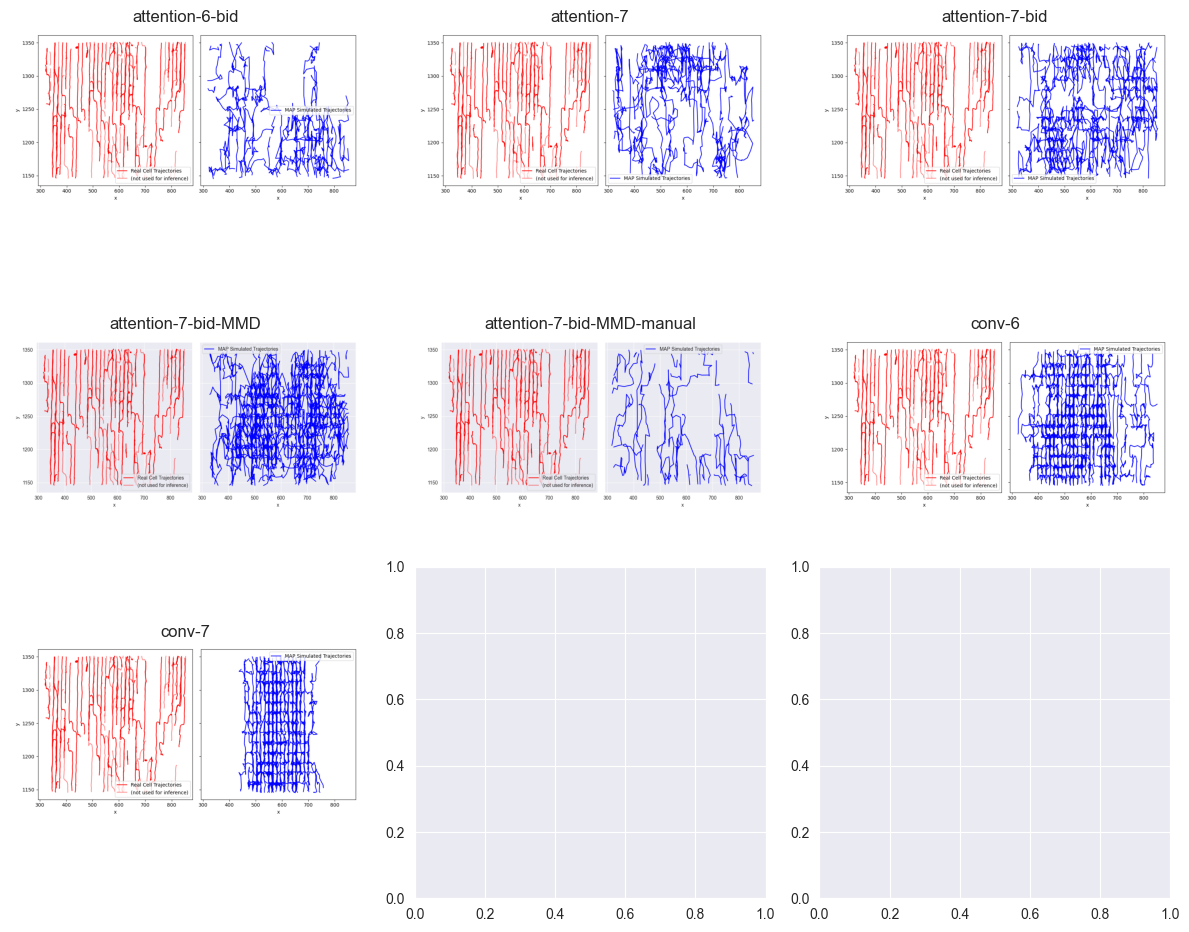

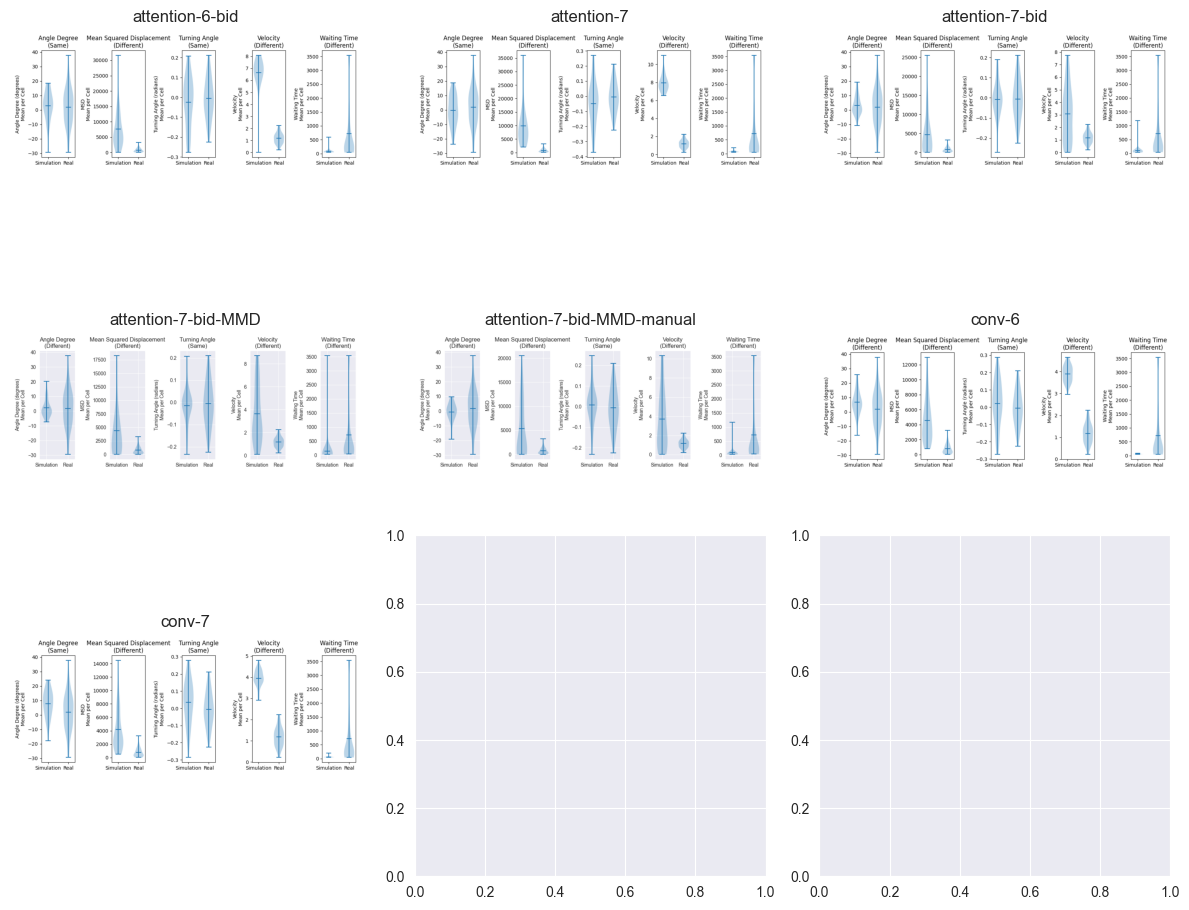

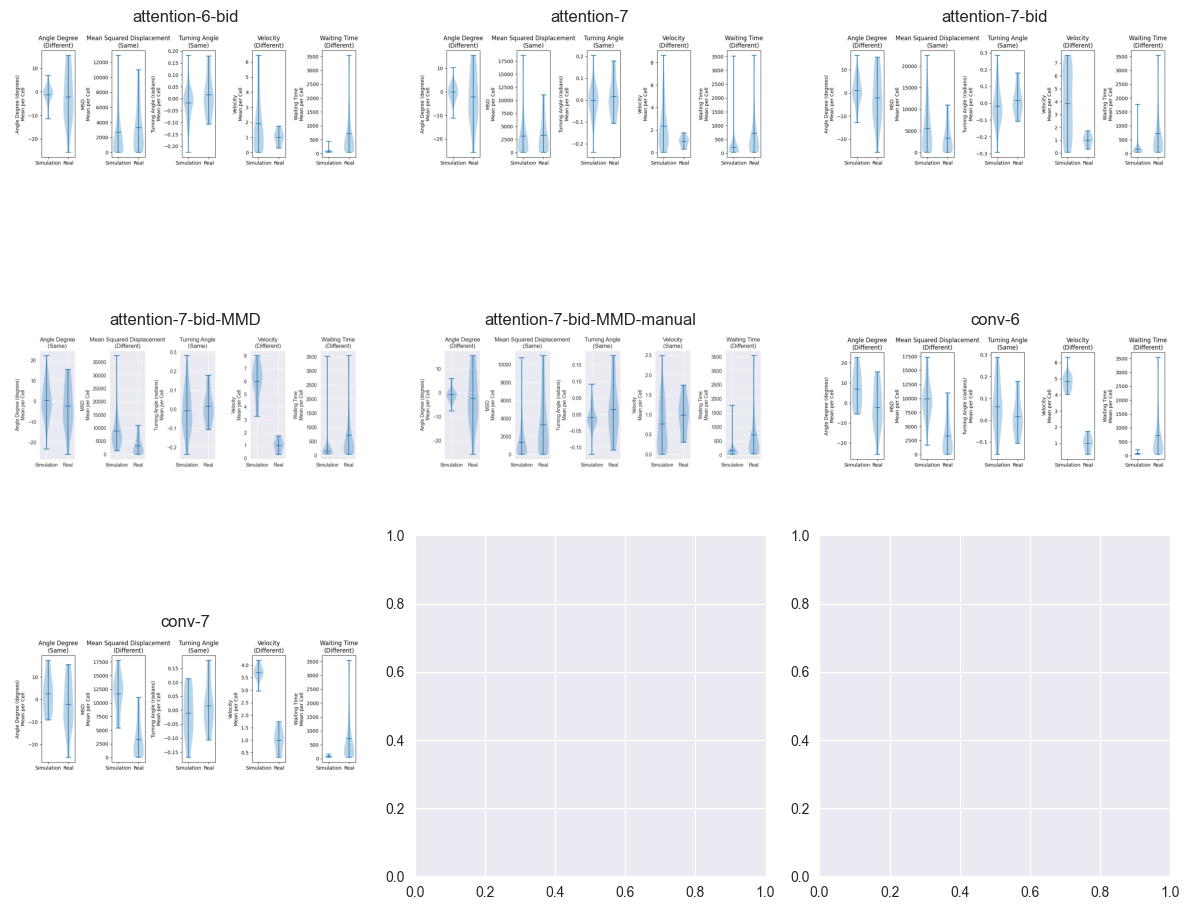

In [4]:
# get all folders in the current directory
folders = [f for f in os.listdir() if os.path.isdir(f)]
folders.remove("old")
folders.sort()
# open all folders and plot them in a row
result_images = ["Real_0 posterior_vs_prior.png", "Real_1 posterior_vs_prior.png",
                 "Real_0 vs Simulations.png", "Real_1 vs Simulations.png", 
                 "Real_0 Summary Stats.png","Real_1 Summary Stats.png"]

for img_name in result_images:
    fig, ax = plt.subplots(3, len(folders)//2, tight_layout=True, figsize=(12, 10))
    ax = ax.flatten()
    for i, folder in enumerate(folders):
        img = mpimg.imread(os.path.join(folder, img_name))
        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(folder[25:])    
    plt.show()

## Results are very similar
- all networks converged and are calibrated well
- attention did improve the results
- bidirectional lstm slightly improved the summary statistics
- only two of five parameters are identifiable
- simulations seems quite accurate
- removing all nan samples made the results worse
- MMD made the wasserstein distance a bit worse

Summary statistics seems still different, hypothesis test tells us that most of the population distributions are different. However, MMD of summary latent space cannot distinguish between real and simulated data.

Hybrid approach seems to further improve similarity between real and simulated data on summary statistics (should be the case, since similarity is computed on parts of the summary statistics).

### Wasserstein Distances on Real Data Summary Statistics (sum over all statistics and data sets)
- 7720.79: attention-7-bid-MMD-manual
- 7335.52: attention-7-bid
- 9046.98: attention-6-bid
- 10420.47: attention-7-bid-MMD
- 11474.32: attention-7
- 11746.60: conv-6
- 13099.88: conv-7
